<a href="https://colab.research.google.com/github/VictorWentz/Analise_airbnb_berlin/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Berlin*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Berlin, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [34]:
# importar os pacotes necessarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
# importar o arquivo listings.csv para um DataFrame
data = pd.read_csv("http://data.insideairbnb.com/germany/be/berlin/2021-09-21/visualisations/listings.csv")


## Análise dos Dados


**Dicionário das variáveis**

* **id**: Id do Anuncio
* **name**: Nome do local
* **host_id**: Id do Host
* **host_name**: Nome do Host
* **neighbourhood_group**: Regões
* **neighbourhood**: bairros 
* **latitude**: Latitude utilizando WGS84. 
* **longitude**: Longitude utitlizando WGS84.
* **room_type**: Tipo do quarto ofertado
* **price**: Preço
* **minimum_nights**: Quantidade minima de noites para reservar
* **number_of_reviews**: Quantidade de reviews
* **last_review**: Data do ultimo review
* **reviews_per_moth**: Quantidade de review por mês
* **calculatd_host_listings_count**: Quantidade de imoveis do mesmo host
* **availability_365**: Numero de dias de disponiblidade dentro de 1 ano
* **number_of_reviews_ltm**:
* **license**: 

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [36]:
# mostrar as 5 primeiras entradas
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,77,90,143,2021-07-22,2.15,5,326,10,NaN
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,2017-03-20,1.12,1,93,1,NaN
2,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54301,13.41534,Private room,33,1,293,2019-12-11,2.40,1,0,0,NaN
3,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.16,1,0,0,03/Z/RA/003410-18
4,14325,Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70,90,26,2013-02-01,0.26,3,102,1,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [37]:
# identificar o volume de dados do DataFrame
print(f"{data.shape[0]} entradas")
print(f"{data.shape[1]} variaveis \n")

display(data.dtypes)

18288 entradas
18 variaveis 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Os dados faltantes estão distribuidos da seguinte forma: \
`License`: 87% \
`reviews_per_month`: 19% \
`last_review`: 19% \
`name`: 0.15% \
`host_name`:  0.08% 

In [38]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(data.isna().sum().sort_values(ascending=False) / data.shape[0] ) * 100

license                           87.592957
reviews_per_month                 19.531934
last_review                       19.531934
name                               0.158574
host_name                          0.087489
longitude                          0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
room_type                          0.000000
number_of_reviews_ltm              0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
id                                 0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

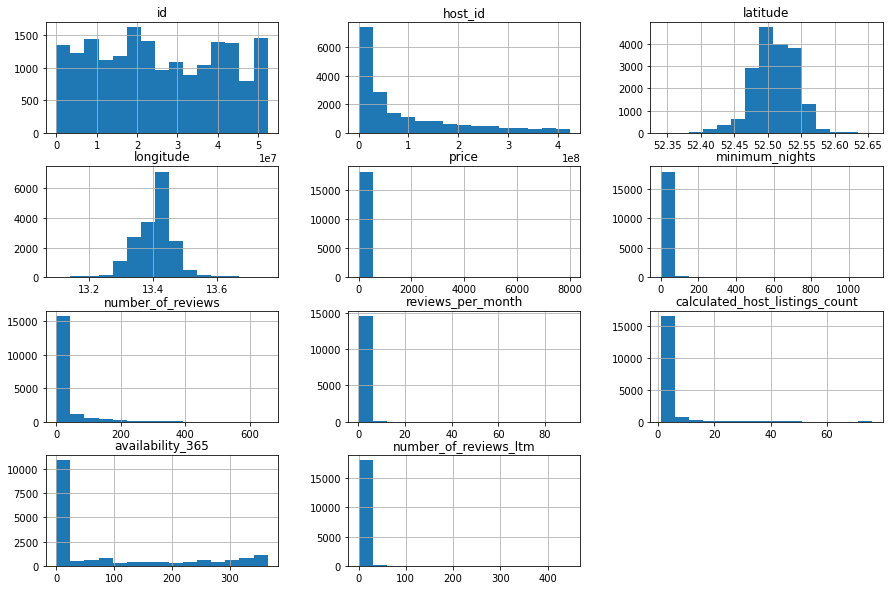

In [39]:
# plotar o histograma das variáveis numéricas
data.hist(bins = 15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

O valor médio das instalações é de 75 euros

In [40]:
# ver a média da coluna `price``
data.price.mean()

75.18963254593176

### **Q4. Há outliers presentes?**

Com o `.describe()`, conseguimos um resumo estatístico que nos confirma que:
* A variável `price` possui 75% dos seus valores abaixo de 85, porem seu valor máximo é de 8000.
* A variável `minimum_nights` tem o seu valor máximo maior que 365 dias no ano.

In [56]:
data.drop(["id", "host_id", "latitude", "longitude"], axis = 1).describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,18288.000000,18288.000000,18288.000000,14716.000000,18288.000000,18288.000000,18288.000000
mean,75.189633,9.324256,22.789042,0.815542,3.025153,85.560860,2.679899
std,122.670894,34.238860,51.019422,1.577983,7.454440,124.507031,9.356743
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,35.000000,2.000000,1.000000,0.090000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,4.000000,0.300000,1.000000,0.000000,0.000000
75%,85.000000,5.000000,17.000000,1.000000,2.000000,162.000000,2.000000
max,8000.000000,1124.000000,655.000000,90.860000,76.000000,365.000000,447.000000


Valores acima de 30 dias:
2271
12.417979002624673


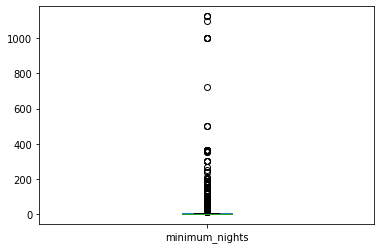

In [66]:
data.minimum_nights.plot(kind='box')
print(f'Valores acima de 30 dias:')
print(f'{len(data[data.minimum_nights > 10])}')
print(f'{(len(data[data.minimum_nights > 10])/ data.shape[0])*100}')

Valores acima de €100:
77
0.4210411198600175


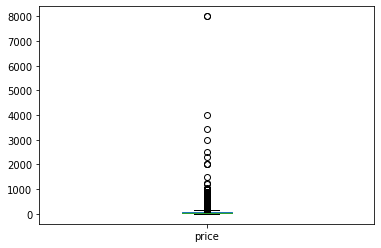

In [65]:
data.price.plot(kind='box')
print(f'Valores acima de €100:')
print(f'{len(data[data.price > 500])}')
print(f'{(len(data[data.price > 500])/ data.shape[0])*100}')

#### Limpando o DataFrame

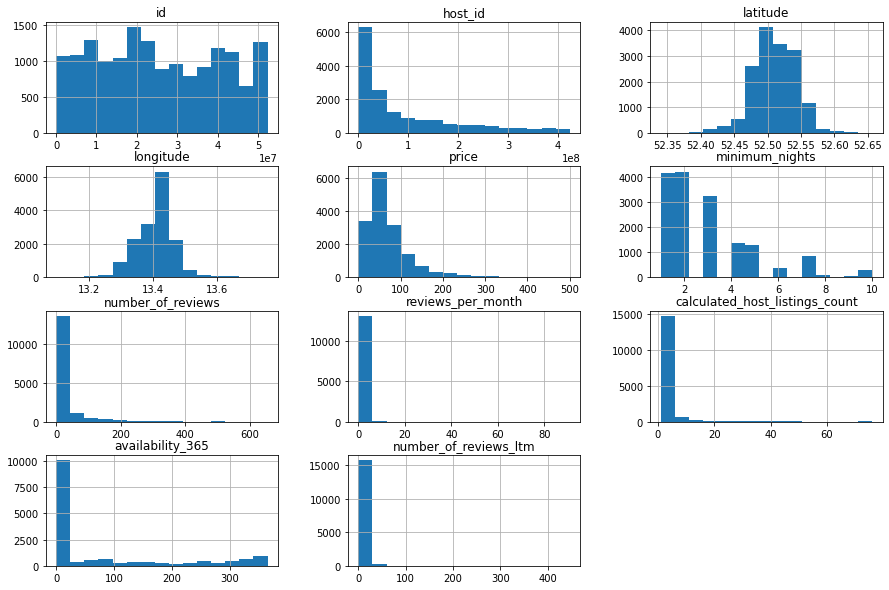

In [67]:
# Removedo os "outliers"
data_clean = data.copy()
data_clean.drop(data_clean[data_clean.price > 500].index, axis = 0, inplace = True)
data_clean.drop(data_clean[data_clean.minimum_nights > 10].index, axis = 0, inplace = True)

data_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Abaixo temos um gráfico de correlação entre as variaveis presentes no dataset,
mas não consiguimos identificar nenhuma correlação forte entre elas

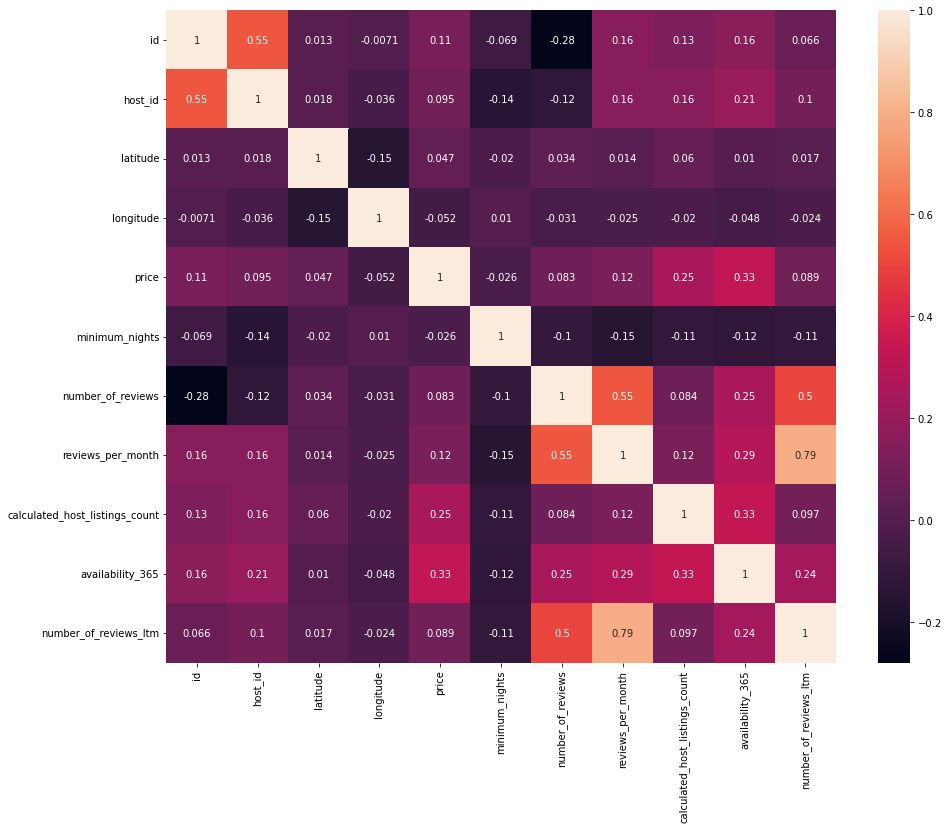

In [68]:
# mostrar a matriz de correlação
plt.figure(figsize=(15,12));
sns.heatmap(data_clean.corr(), annot=True,);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` indica o tipo da locação que está anunciada no Airbnb. E 
o tipo `entire home/apt`, é o tipo mais alugado em berlin. Logo seguido do tipo `Private room`.

In [69]:
# mostrar a quantidade de cada tipo de imóvel disponível
data_clean.room_type.value_counts()

Entire home/apt    8588
Private room       7014
Shared room         187
Hotel room          160
Name: room_type, dtype: int64

In [70]:
# mostrar a porcentagem de cada tipo de imóvel disponível
data_clean.room_type.value_counts(normalize=True)

Entire home/apt    0.538466
Private room       0.439777
Shared room        0.011725
Hotel room         0.010032
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



Em berlin, o bairro [Marzhn-nord](https://www.google.com.br/maps/place/Marzahn,+Berlim,+Alemanha/@52.5421009,13.5172579,13z/data=!3m1!4b1!4m5!3m4!1s0x47a84b8c3ca5c6c9:0x52120465b5fb030!8m2!3d52.5446501!4d13.5646433), em média, é o bairro mais caro para se alugar.
Enquanto o bairro [Neu-Hohenschönhausen](https://www.google.com.br/maps/place/Neu-Hohensch%C3%B6nhausen,+Berlim,+Alemanha/@52.5675004,13.5040241,15z/data=!3m1!4b1!4m5!3m4!1s0x47a84c5bc12f454b:0xccec492438c5f082!8m2!3d52.567079!4d13.5152134) é o mais barato, em média.

In [71]:
# ver preços por bairros, na média
data_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:20]

neighbourhood
Marzahn-Nord                                 270.000000
Haselhorst                                   189.083333
Regierungsviertel                            139.823529
Köpenick-Süd                                 132.407407
Spandau Mitte                                130.777778
Kurfürstendamm                               122.651786
Müggelheim                                   109.846154
Heerstrasse                                  107.783784
Allende-Viertel                              106.500000
Marzahn-Süd                                  105.291667
Brunnenstr. Süd                              103.888679
Prenzlauer Berg Südwest                      103.252822
Malchow, Wartenberg und Falkenberg           101.333333
Wilhelmstadt                                  99.846154
Alexanderplatz                                99.348131
Rummelsburger Bucht                           94.722222
Altstadt-Kietz                                92.555556
Kantstraße                        

In [114]:
data_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[-1:]

neighbourhood
Neu-Hohenschönhausen Süd    29.333333
Name: price, dtype: float64

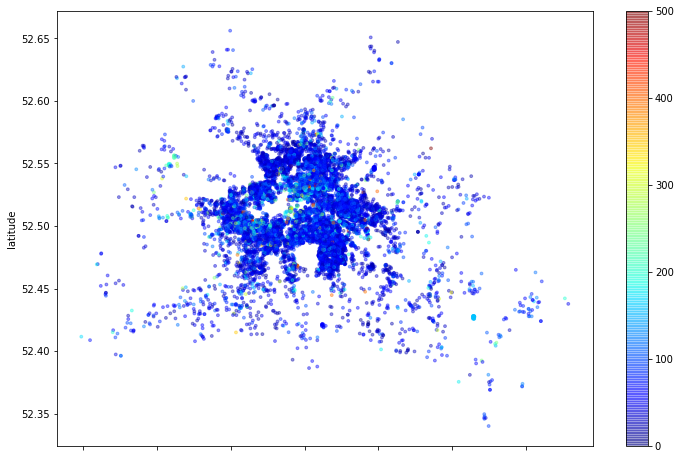

In [73]:
# plotar os imóveis pela latitude-longitude
data_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=data_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Localidade com maior numero de review?**

In [76]:
data_clean.groupby(['neighbourhood']).number_of_reviews.mean().sort_values(ascending=False)[:20]

neighbourhood
Altglienicke                           64.550000
Allende-Viertel                        62.750000
Nord 2                                 54.636364
Rudow                                  53.529412
Regierungsviertel                      52.235294
West 2                                 52.125000
Hellersdorf-Süd                        47.500000
Heerstraße Nord                        46.142857
Hellersdorf-Ost                        45.800000
Haselhorst                             45.666667
West 4                                 44.181818
Alexanderplatz                         42.032710
Prenzlauer Berg Südwest                41.250564
Gatow / Kladow                         39.736842
Tiergarten Süd                         38.896296
Mahlsdorf                              38.640000
Schloß Charlottenburg                  37.676190
Köpenick-Nord                          36.625000
Blankenburg/Heinersdorf/Märchenland    36.500000
Gropiusstadt                           36.375000
Name: 

In [96]:
data_clean.query('neighbourhood == "Altglienicke"').price.mean()

47.45

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [74]:
# ver a média da coluna `minimum_nights``
data_clean['minimum_nights'].mean()

2.912659100884068

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

O bairro Marzahn-Nord é o mais caro de berlin, e o Neu-Hohenschönhausen Süd, o mais barato, uma análise mais aprofundada olhando para o rating de cada bairro deve ser realizado.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.